## Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Loading the data

In [ ]:
# Load Iris dataset
#df = sns.load_dataset("iris")

In [38]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=1m_LS5jpk1YrHqIiHuXK0GOWHvJ1KnoEH"

# If it's a CSV:
df = pd.read_csv(url)
print(df.shape)
df.head()


(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 1. Summary Statistics & Missing-Value Report

In [16]:
print("An overview of the dataset: the first 5 rows")
df.head()

An overview of the dataset: the first 5 rows


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
print("An overview of the dataset: the last 5 rows")
df.tail()

An overview of the dataset: the last 5 rows


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [18]:
print("An overview of the dataset: a random sample of 5 rows")
df.sample(5)

An overview of the dataset: a random sample of 5 rows


,sepal_length,sepal_width,petal_length,petal_width,species
42,4.4,3.2,1.3,0.2,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor
131,7.9,3.8,6.4,2.0,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa
97,6.2,2.9,4.3,1.3,Iris-versicolor


In [19]:
print("An overview of the dataset: the shape of the dataset")
print(df.info())

An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [20]:
print("Check for missing values:")
print(df.isna().sum())

Check for missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [12]:
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
            species
count           150
unique            3
top     Iris-setosa
freq             50


In [14]:
print("The description of all columns:")
print(df.describe(include='all'))

The description of all columns:
        sepal_length  sepal_width  petal_length  petal_width      species
count     150.000000   150.000000    150.000000   150.000000          150
unique           NaN          NaN           NaN          NaN            3
top              NaN          NaN           NaN          NaN  Iris-setosa
freq             NaN          NaN           NaN          NaN           50
mean        5.843333     3.054000      3.758667     1.198667          NaN
std         0.828066     0.433594      1.764420     0.763161          NaN
min         4.300000     2.000000      1.000000     0.100000          NaN
25%         5.100000     2.800000      1.600000     0.300000          NaN
50%         5.800000     3.000000      4.350000     1.300000          NaN
75%         6.400000     3.300000      5.100000     1.800000          NaN
max         7.900000     4.400000      6.900000     2.500000          NaN


In [25]:
# Exact duplicate rows
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)


Duplicate rows: 3
Cardinality (categoricals): {'species': 3}


## Univariate Analysis

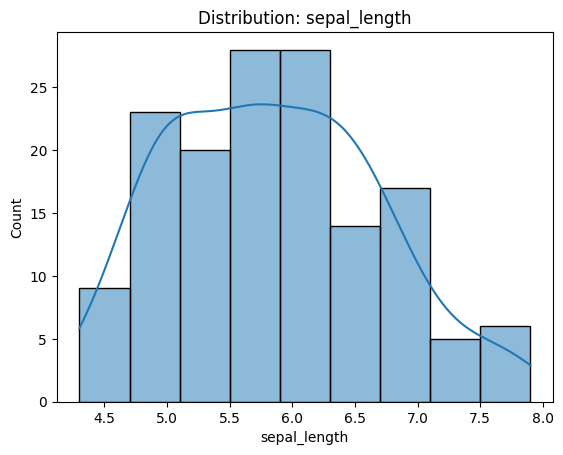

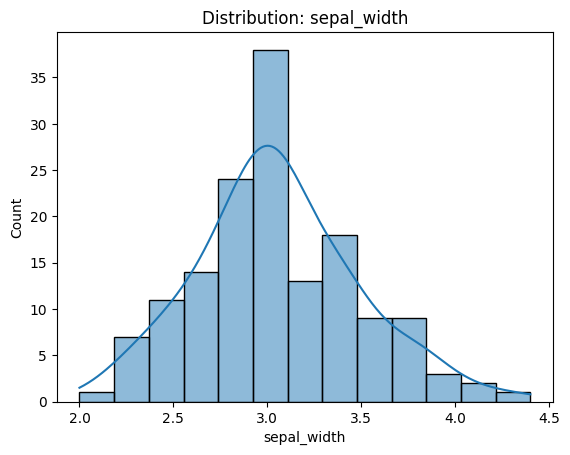

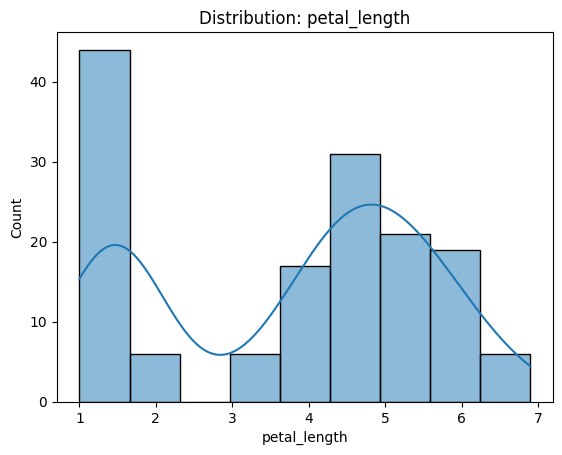

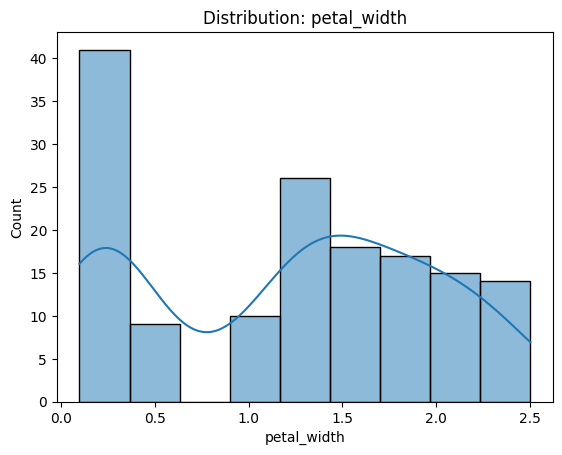

In [26]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure()
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()


##  Univariate Analysis – Interpretation

### 1. **Sepal Length**
- The distribution of **sepal_length** is roughly **bell-shaped** but slightly **right-skewed**.  
- Most flowers have medium-sized sepals (around **5.5–6.5 cm**), with a few longer ones up to about **8 cm**.  
- This suggests natural variation among species but no extreme outliers after cleaning.

---

### 2. **Sepal Width**
- The **sepal_width** distribution looks approximately **normal**, centered around **3 cm**.  
- It is fairly symmetric, indicating consistent measurements across all observations.  
- This feature is stable and likely doesn’t need transformation.

---

### 3. **Petal Length**
- The **petal_length** distribution is **bimodal (two peaks)** — one around **1.5 cm** and another around **4.5–5 cm**.  
- This clear separation indicates **distinct species groups** (e.g., *setosa* vs. *versicolor/virginica*).  
- This feature is expected to be **highly discriminative** in classification tasks.

---

### 4. **Petal Width**
- The **petal_width** distribution also shows a **bimodal pattern**, similar to petal length.  
- One group has small petals (~**0.2 cm** width), while another clusters around **1.5 cm**.  
- This reinforces that petal measurements are **strong indicators** for distinguishing species.

---

### 🔍 Summary
- **Sepal features** (length, width) show moderate variability and are roughly normal.  
- **Petal features** display **clear multimodal separation**, suggesting they are key predictors of species.  
- The dataset appears **clean, consistent, and well-structured**, ready for deeper bivariate and multivariate analysis.


# Box Plots (numeric)

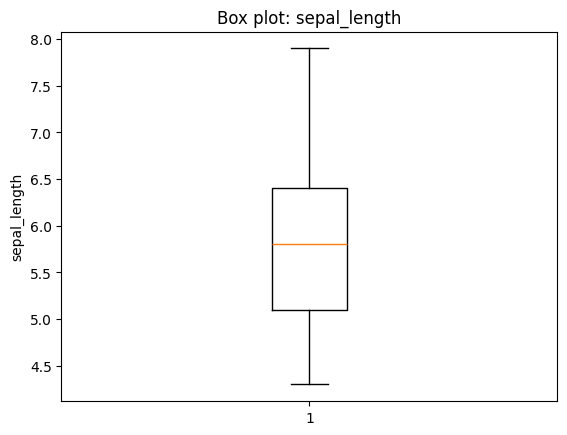

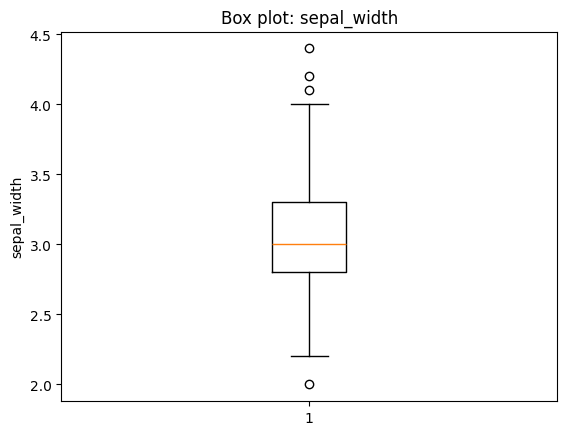

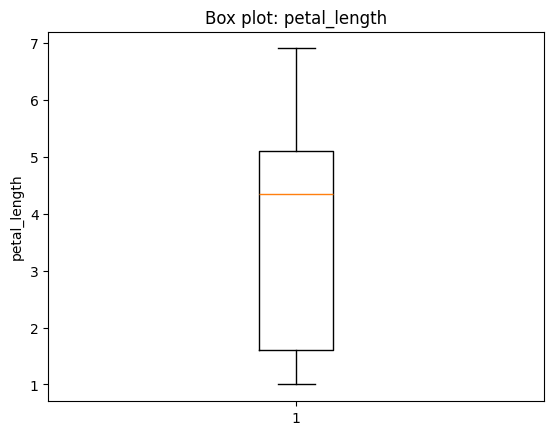

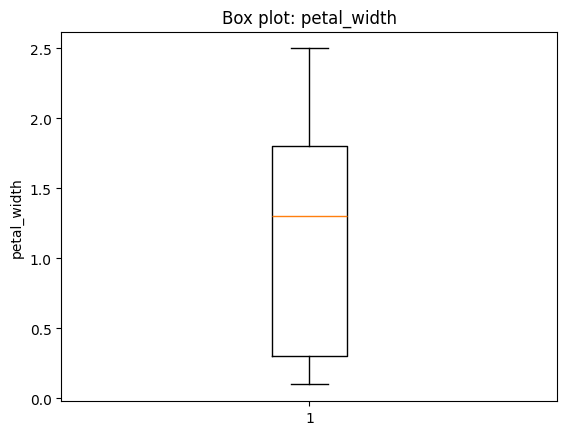

In [ ]:
for c in num_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Box plot: {c}")
    plt.ylabel(c)
    plt.show()


##  Box Plot Analysis – Interpretation

### 1. **Sepal Length**
- The **sepal_length** values range approximately from **4.3 to 8.0 cm**.  
- The box is relatively centered, indicating **moderate variability** and a nearly symmetric distribution.  
- There are **no significant outliers**, suggesting consistent measurements across samples.

---

### 2. **Sepal Width**
- **sepal_width** ranges from **2.0 to 4.4 cm**, with several small **outliers above 4.0 cm**.  
- The median (~3.0 cm) is slightly above the center, indicating a **slight left-skew** (a few lower values).  
- These outliers may represent natural variations rather than errors, as the differences are minor.

---

### 3. **Petal Length**
- The **petal_length** feature spans roughly **1.0 to 7.0 cm**, showing a **large interquartile range (IQR)**.  
- This indicates **high variability** and potentially multiple clusters — aligning with different species of Iris.  
- No clear extreme outliers are present, but the spread confirms significant variation among flower types.

---

### 4. **Petal Width**
- **petal_width** ranges from **0.1 to 2.5 cm** and shows a **wide distribution**.  
- The median (~1.3 cm) divides the data into two visible groups, suggesting **bimodal behavior** across species.  
- The absence of strong outliers indicates that all measurements are within reasonable biological limits.

---

### 🔍 Summary
- **Sepal features** are relatively stable, with a few mild outliers in width.  
- **Petal features** display higher variability, which helps differentiate between Iris species.  
- Overall, the dataset is clean and balanced, showing **expected biological diversity** rather than data errors.


Frequency Table (categorical)

In [28]:
for c in cat_cols:
    display(df[c].value_counts().rename("count").to_frame())


,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## 3) Outlier Detection

Z-Score Method (|z| > 3)

In [29]:
z = np.abs(stats.zscore(df[num_cols], nan_policy="omit"))
z_outliers_mask = (z > 3).any(axis=1)
print("Z-score outlier rows:", int(z_outliers_mask.sum()))


Z-score outlier rows: 1


In [ ]:
# Keep only rows where all |Z| <= 3 (no outliers)
df_clean = df[(z < 3).all(axis=1)]

print("After removing Z-score outliers:", df_clean.shape)

# 5️⃣ Save cleaned dataset
df_clean.to_csv("../data/iris_clean.csv", index=False)

print("Cleaned dataset saved to: data/iris_clean.csv")

After removing Z-score outliers: (149, 5)
Cleaned dataset saved to: data/iris_clean.csv


## Bivariate Analysis
 Scatter Plots (selected pairs, colored by species)

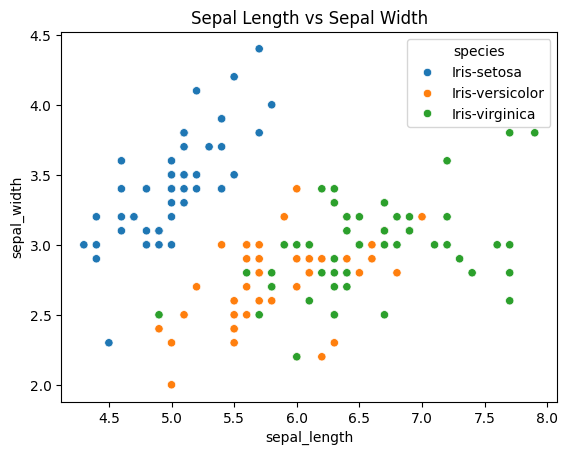

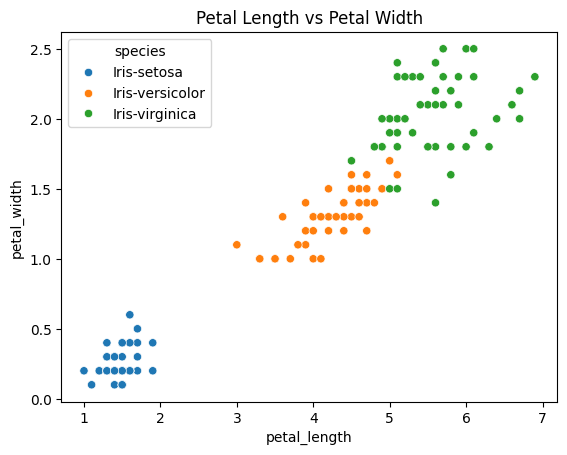

In [31]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")
plt.title("Sepal Length vs Sepal Width")
plt.show()

sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")
plt.title("Petal Length vs Petal Width")
plt.show()


##  Bivariate Analysis – Scatter Plot Interpretation

### 1. **Sepal Length vs. Sepal Width**
- The scatter plot shows a **mild negative relationship** — as **sepal length** increases, **sepal width** tends to decrease slightly.  
- **Iris-setosa** (blue points) forms a **distinct, compact cluster** with smaller sepals but wider widths.  
- **Iris-versicolor** (orange) and **Iris-virginica** (green) overlap more, indicating similar sepal proportions.  
- Overall, **sepal dimensions** are **less effective** for separating species compared to petal features.

---

### 2. **Petal Length vs. Petal Width**
- The relationship between **petal length** and **petal width** is **strongly positive** — as petals get longer, they also become wider.  
- The three species are **well-separated**:
  - **Setosa** (blue) has the **smallest petals**, forming a clear, isolated group.  
  - **Versicolor** (orange) occupies the **middle range**, showing moderate lengths and widths.  
  - **Virginica** (green) has the **largest petals**, clustered in the upper-right corner.  
- This clear pattern highlights **petal size as a key discriminating feature** among the Iris species.

---

### 🔍 Summary
- **Sepal features** show overlap and weaker correlations between species.  
- **Petal features** exhibit strong positive correlation and **distinct clustering**, making them the most informative predictors for species classification.


## Correlation Matrix & Heatmap (numeric)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


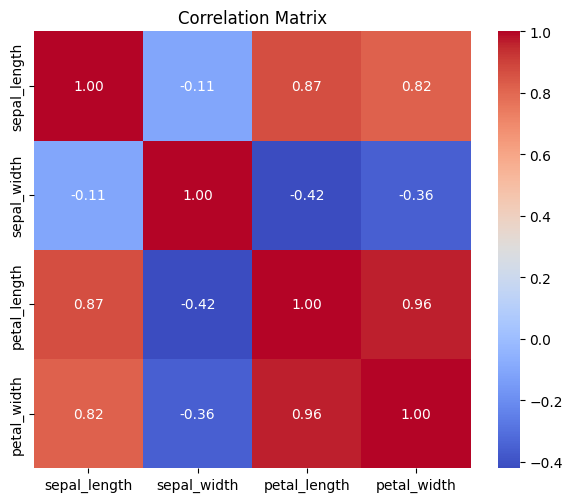

In [32]:
corr = df[num_cols].corr()
display(corr)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


##  Correlation Matrix – Interpretation

**Quick read of the numbers (Pearson r):**
- **Petal length ↔ Petal width: r = 0.96 (very strong +)**  
  Petal dimensions grow together; they carry almost the same information. Expect **multicollinearity**.

- **Sepal length ↔ Petal length: r = 0.87 (strong +)**  
  Longer sepals tend to come with longer petals.

- **Sepal length ↔ Petal width: r = 0.82 (strong +)**  
  Reinforces the size relationship across organs.

- **Sepal width ↔ Petal length: r = −0.42 (moderate −)**  
  Wider sepals often come with shorter petals.

- **Sepal width ↔ Petal width: r = −0.36 (moderate −)**  
  Similar inverse trend with petal width.

- **Sepal length ↔ Sepal width: r = −0.11 (very weak −)**  
  Essentially uncorrelated.

### What this means for modeling
- **Petal features dominate:** They’re strongly correlated with each other and with overall size—great **predictors of species**.
- **Watch collinearity:** Because **petal_length** and **petal_width** are ~duplicate in information, some models (e.g., linear/logistic regression) may need **regularization** or you might choose **one of them**, or use **PCA**.
- **Sepal width adds contrast:** Its negative correlations suggest it could add complementary signal when combined with petal features.


## Multivariate Analysis
 Pairplot (quick overview)

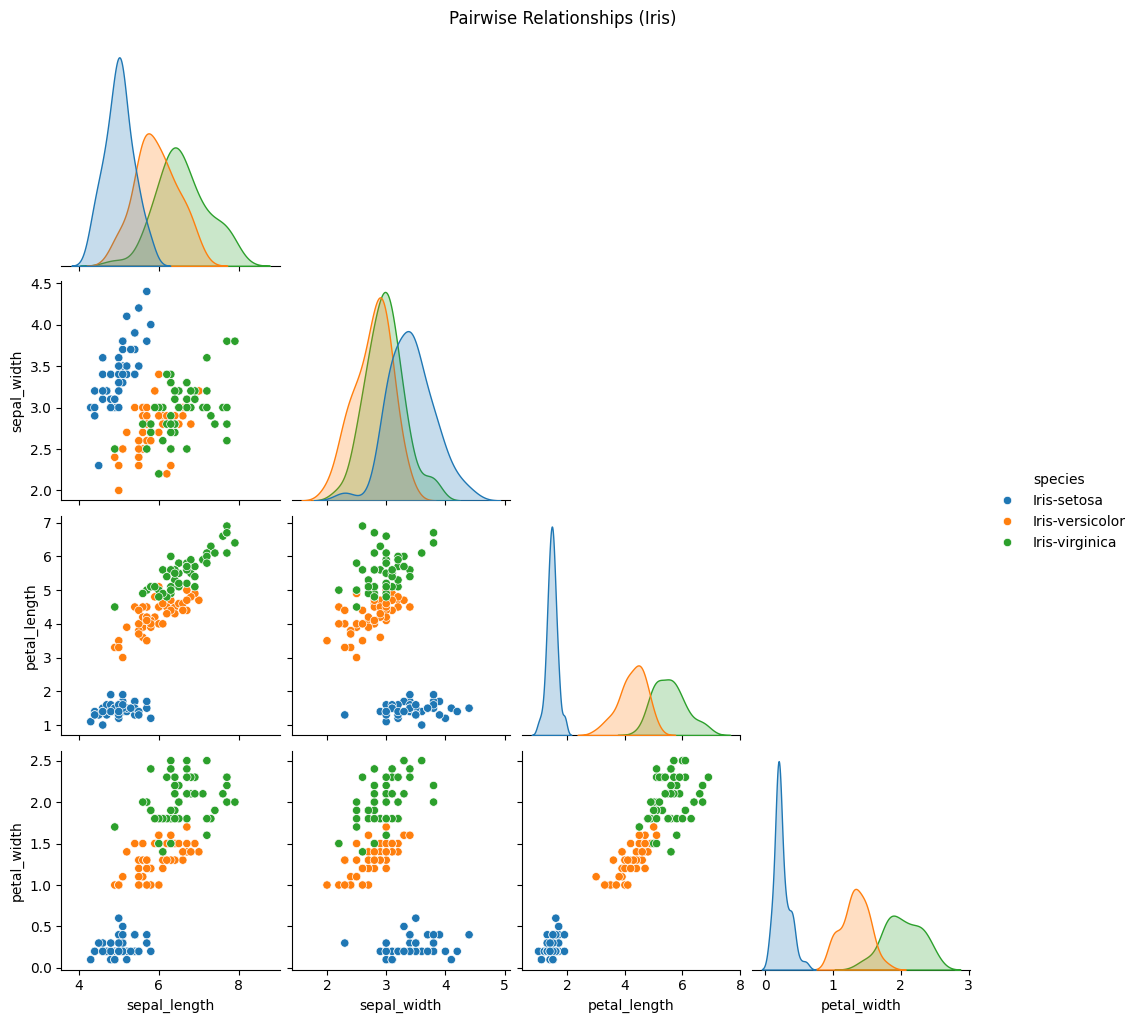

In [33]:
sns.pairplot(df, hue="species", corner=True)
plt.suptitle("Pairwise Relationships (Iris)", y=1.02)
plt.show()


## Pairplot Analysis – Multivariate Interpretation

### Overview
The pairplot visualizes **pairwise relationships** between all numeric features of the Iris dataset while distinguishing species by color.  
Each diagonal plot shows a **distribution (KDE)** of one variable, and the scatter plots below show **relationships between pairs of variables**.

---

### Key Observations

#### 1. **Iris-setosa (blue)**
- Forms **distinct, isolated clusters** across almost all feature pairs.  
- Setosa’s petals are **much smaller** (shorter and narrower) than the other two species.  
- Clear separation suggests that **setosa can be easily classified** using petal features alone.

#### 2. **Iris-versicolor (orange)**  
- Lies **between setosa and virginica** in most feature dimensions.  
- Displays a **moderate linear relationship** between petal length and petal width.  
- Slight overlap with virginica indicates **partial similarity** in flower size and structure.

#### 3. **Iris-virginica (green)**  
- Occupies the **upper-right region** in most scatter plots, meaning **larger petals and sepals** overall.  
- Shows a **strong positive correlation** between petal length and petal width (longer petals are wider).  
- Well separated from the other two species, especially on petal-based features.

---

### Feature Relationships
- **Petal features (length & width)** show **strong positive linear correlations** and **clear species clustering** — highly discriminative.
- **Sepal features (length & width)** overlap more between species, offering **less separation**.
- **Cross-feature patterns** (e.g., sepal vs petal) reveal that petal measurements contribute more to inter-species distinction.

---

###  Summary
- **Setosa** is clearly separable → smallest petal dimensions.  
- **Versicolor** and **Virginica** show **gradual transition** → moderate overlap.  
- **Petal length & width** are the most **important predictive features** for classification.  
- The overall structure of the dataset is **well-defined and non-random**, ideal for supervised learning models.


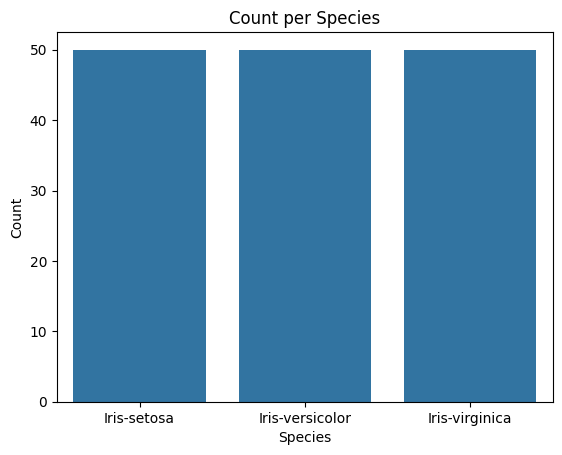

In [35]:
sns.countplot(data=df, x="species")
plt.title("Count per Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()
